<a href="https://colab.research.google.com/github/Deepakshukla12/Deepakshukla12/blob/main/Fashion_MNIST_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

Loading the Data

In [30]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# here we are importing the dataset diretly from the keras library

In [31]:
# Print the shape of data

X_train.shape, y_train.shape,"*************", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '*************', (10000, 28, 28), (10000,))

In [32]:
X_train[0]

# As we know, we have divided the data  into train and test. And in this code we are printing the first image /elementdimensions of the X_train.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [33]:
y_train[0]

# As we know, we have divided the data  into train and test. And in this code we are printing the first image/element dimensions of the y_train.

9

In [34]:
class_labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [35]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

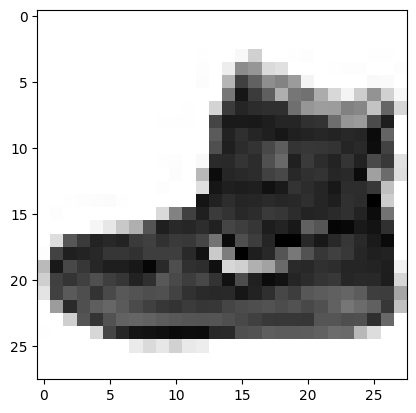

In [36]:
plt.imshow(X_train[0], cmap='Greys')

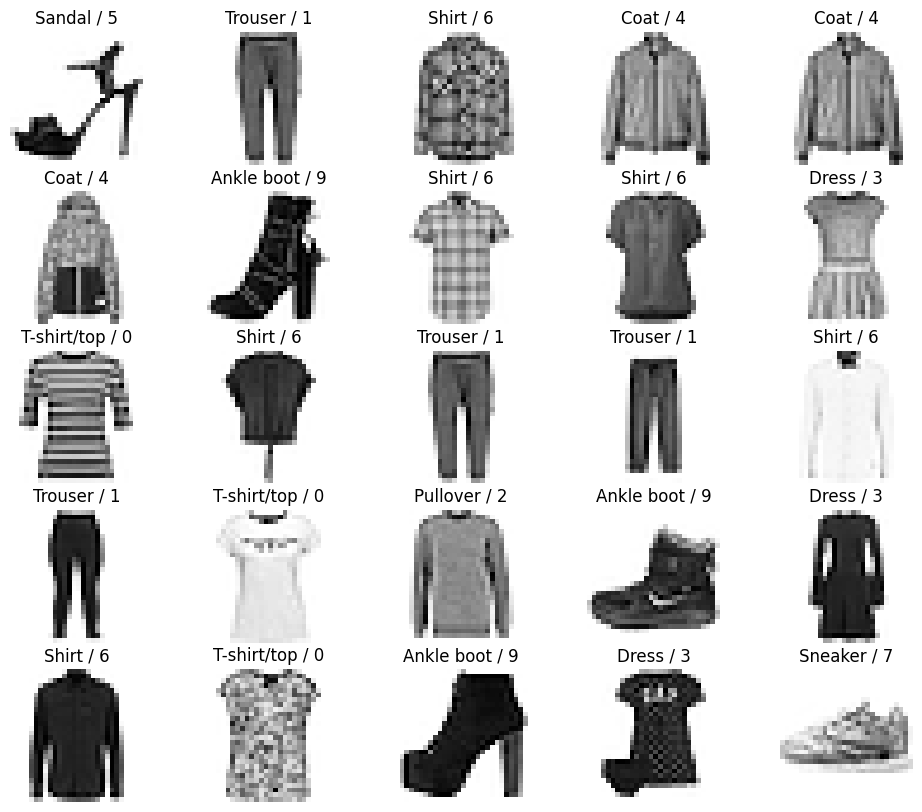

In [37]:
plt.figure(figsize=(12,10))

j=1
for i in np.random.randint(0,100,25):
  plt.subplot(5, 5, j);j+=1
  plt.imshow(X_train[i], cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [38]:
X_train.ndim


3

In [39]:
X_train=np.expand_dims(X_train, -1)

#  np.expand_dims function to add a new dimension to the X_train dataset.

# The -1 argument is used to add a new axis at the end of the array, effectively converting the dataset from a 2D array (representing grayscale images) to a 3D array.

In [40]:
X_train.ndim

4

In [41]:
X_test=np.expand_dims(X_test, -1)

In [42]:
# Feature Scaling

X_train=X_train/255
X_test=X_test/255

# Normalizing the pixel values of the images in the X_train and X_test datasets.
# By dividing each pixel value by 255, you are scaling the pixel values to a range between 0 and 1

In [49]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation = train_test_split(X_train, y_train, test_size=0.2,random_state=2020)

# Here we are splitting the data inti into train and test to make model and apply appropriate algorithm

In [50]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((38400, 28, 28, 1), (9600, 28, 28, 1), (38400,), (9600,))

In [51]:
# building the CNN model

model = keras.models.Sequential([keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28, 28, 1]),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
keras.layers.Flatten(),
keras.layers.Dense(units=128, activation='relu'),
keras.layers.Dense(units=10, activation='softmax')
])

# keras.layers.Conv2D: This is a convolutional layer with 32 filters, a kernel size of 3x3, 'valid' padding, and ReLU activation function.
# keras.layers.MaxPooling2D: This is a max-pooling layer with a pool size of 2x2. It reduces the spatial dimensions of the feature maps produced by the previous convolutional layer.
# keras.layers.Flatten: This layer flattens the output from the previous layers, converting it into a 1D vector. This is necessary before feeding the data into the fully connected layers.
# keras.layers.Dense: A fully connected layer with 128 units and ReLU activation. This layer is responsible for learning high-level features from the flattened data.
#

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [58]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_Validation,y_Validation))

Epoch 1/10
75/75 [==============================] - 21s 266ms/step - loss: 0.6664 - accuracy: 0.7722 - val_loss: 0.4316 - val_accuracy: 0.8529
Epoch 2/10
75/75 [==============================] - 18s 246ms/step - loss: 0.4008 - accuracy: 0.8609 - val_loss: 0.3896 - val_accuracy: 0.8627
Epoch 3/10
75/75 [==============================] - 20s 264ms/step - loss: 0.3490 - accuracy: 0.8788 - val_loss: 0.3421 - val_accuracy: 0.8794
Epoch 4/10
75/75 [==============================] - 18s 246ms/step - loss: 0.3153 - accuracy: 0.8895 - val_loss: 0.3311 - val_accuracy: 0.8825
Epoch 5/10
75/75 [==============================] - 19s 260ms/step - loss: 0.2933 - accuracy: 0.8968 - val_loss: 0.3189 - val_accuracy: 0.8886
Epoch 6/10
75/75 [==============================] - 18s 246ms/step - loss: 0.2761 - accuracy: 0.9024 - val_loss: 0.3129 - val_accuracy: 0.8899
Epoch 7/10
75/75 [==============================] - 21s 280ms/step - loss: 0.2605 - accuracy: 0.9079 - val_loss: 0.2961 - val_accuracy: 0.8950

In [60]:
y_pred=model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 3s 10ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.06, 0.02, 0.  ]], dtype=float32)

In [62]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [63]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2870 - accuracy: 0.8964


[0.2870480418205261, 0.896399974822998]

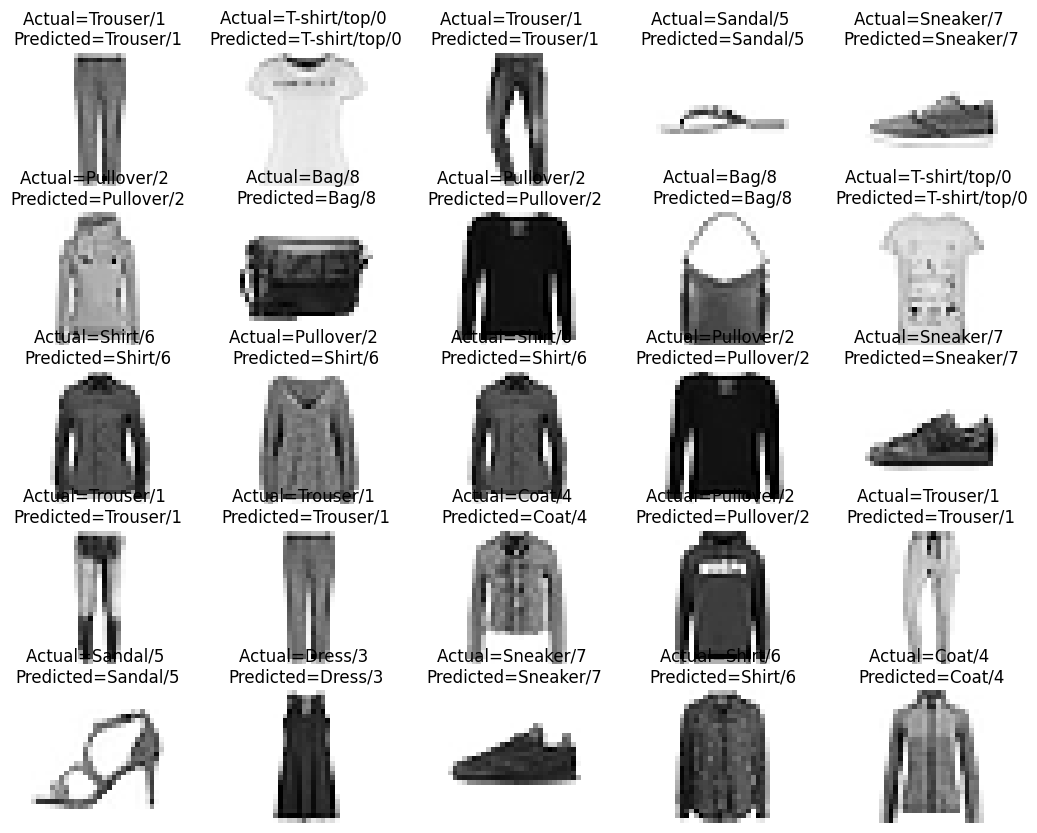

In [69]:
plt.figure(figsize=(13,10))

j=1
for i in np.random.randint(0,100,25):
  plt.subplot(5, 5, j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual={}/{} \nPredicted={}/{}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

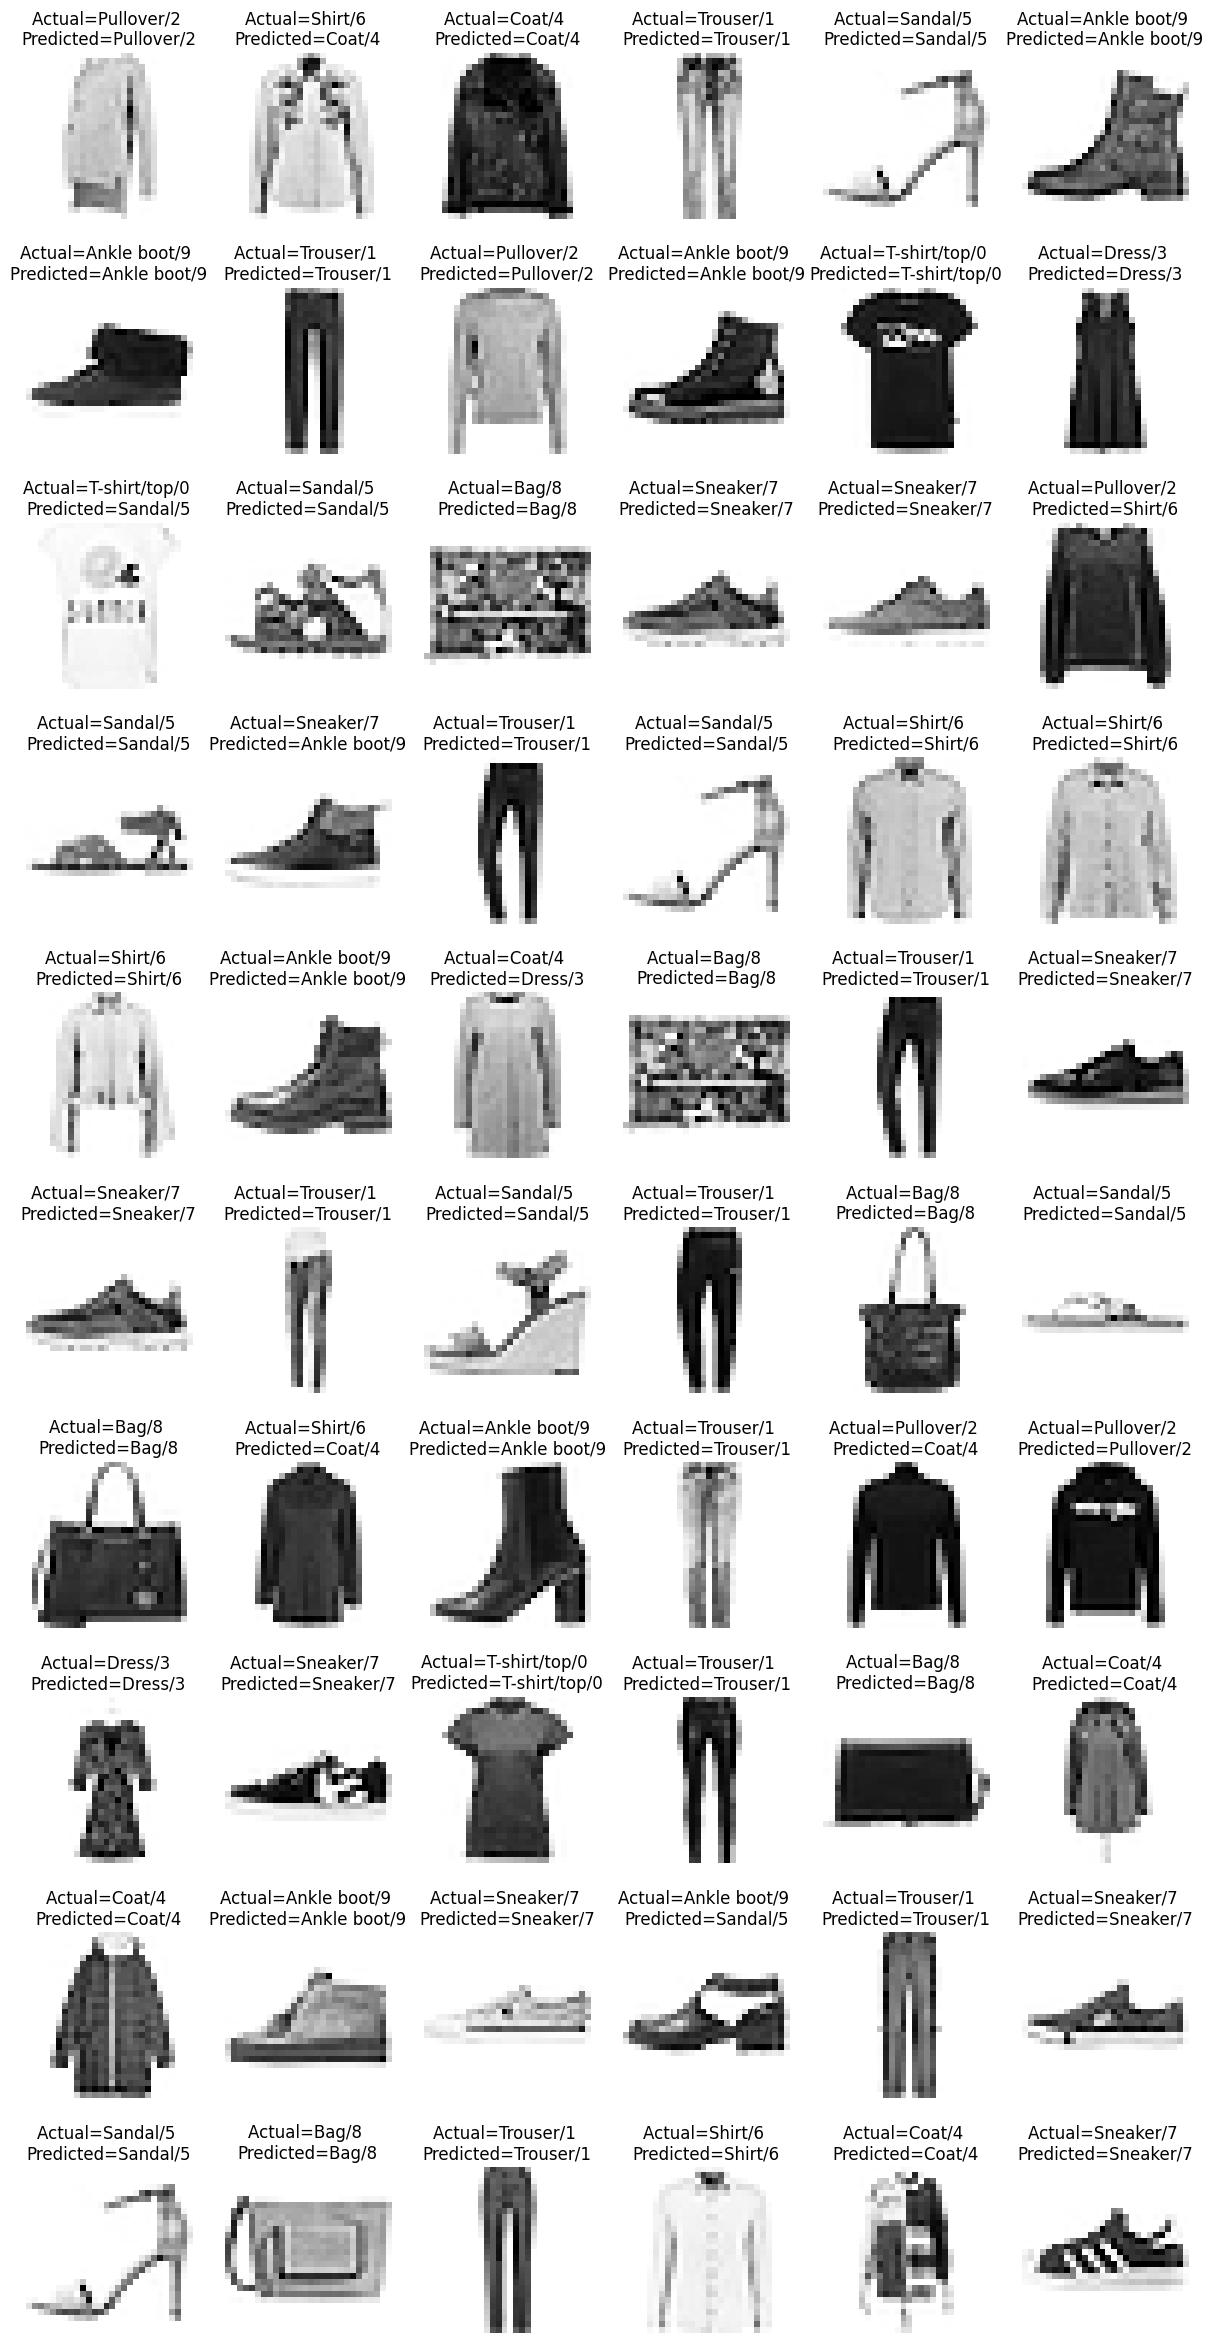

In [72]:
plt.figure(figsize=(15,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10, 6, j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual={}/{} \nPredicted={}/{}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [77]:
# confusion amtrix

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cn= confusion_matrix(y_test, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.83      0.83      1000
       Dress       0.85      0.94      0.89      1000
        Coat       0.85      0.83      0.84      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.74      0.68      0.71      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



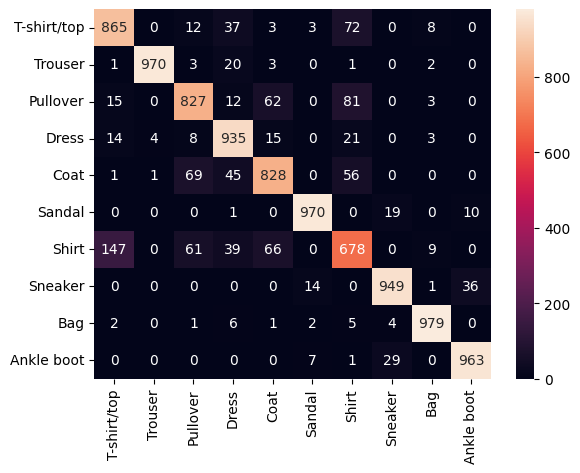

In [81]:
sns.heatmap(cn, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [82]:
model.save('Fasion_mnist_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
